<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-DavRo24/blob/main/Ago11-12/Tarea4/Tarea4_Intento1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Parte 1 del ejercicio
import numpy as np
import matplotlib.pyplot as plt

def polynomial_regression_fit(X, y, degree):
    X_poly = np.column_stack([np.power(X, i) for i in range(0, degree + 1)])
    weights = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y
    return weights

def calculate_cost(X, y, weights):
    predictions = X @ weights
    error = predictions - y
    cost = np.mean(error ** 2)
    return cost

# Cargar los datos desde el archivo
file_path = "/content/drive/MyDrive/Machine-Learning-2023/olympic100m_men.txt"
datos = np.loadtxt(file_path, delimiter=',').T
X = datos[0]
y = datos[1]

# Grado máximo del polinomio
max_degree = 8

# Ajustar modelos y calcular costos para diferentes grados
for degree in range(1, max_degree + 1):
    weights = polynomial_regression_fit(X, y, degree)
    X_poly = np.column_stack([np.power(X, i) for i in range(0, degree + 1)])
    cost = calculate_cost(X_poly, y, weights)
    print(f"Grado {degree}: Costo en entrenamiento = {cost:.4f}")


Grado 1: Costo en entrenamiento = 0.0503
Grado 2: Costo en entrenamiento = 0.0380
Grado 3: Costo en entrenamiento = 0.0296
Grado 4: Costo en entrenamiento = 2.7932
Grado 5: Costo en entrenamiento = 337.5983
Grado 6: Costo en entrenamiento = 0.3317
Grado 7: Costo en entrenamiento = 14.6421
Grado 8: Costo en entrenamiento = 40.9875


In [3]:
#Parte 2 del ejercicio

def calculate_validation_cost(X_val_poly, y_val, weights, degree):
    predictions = X_val_poly @ weights
    error = predictions - y_val
    cost = np.mean(error ** 2)
    return cost


# Dividir los datos en conjuntos de entrenamiento y validación
train_percentage = 0.8
num_train = int(len(X) * train_percentage)
X_train = X[:num_train]
y_train = y[:num_train]
X_val = X[num_train:]
y_val = y[num_train:]

# Ajustar modelos y calcular costos de validación para diferentes grados
for degree in range(1, max_degree + 1):
    weights = polynomial_regression_fit(X_train, y_train, degree)
    X_val_poly = np.column_stack([np.power(X_val, i) for i in range(0, degree + 1)])
    cost_val = calculate_validation_cost(X_val_poly, y_val, weights, degree)
    print(f"Grado {degree}: Costo en validación = {cost_val:.4f}")



Grado 1: Costo en validación = 0.0386
Grado 2: Costo en validación = 0.1756
Grado 3: Costo en validación = 0.0909
Grado 4: Costo en validación = 159.3168
Grado 5: Costo en validación = 1.1728
Grado 6: Costo en validación = 6.2383
Grado 7: Costo en validación = 0.9085
Grado 8: Costo en validación = 1.5400


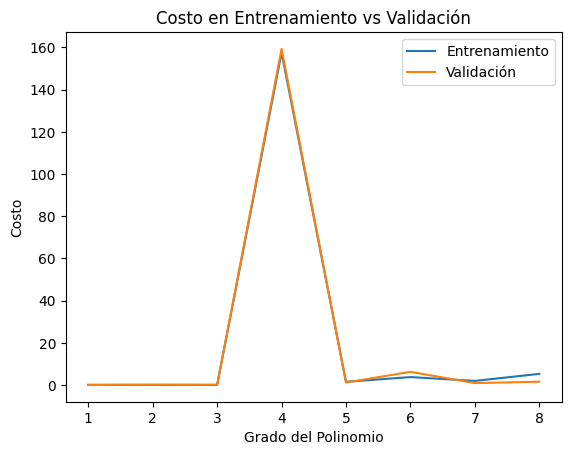

In [4]:
#Parte 3 del ejercicio
train_costs = []
val_costs = []

for degree in range(1, max_degree + 1):
    weights = polynomial_regression_fit(X_train, y_train, degree)
    X_poly = np.column_stack([np.power(X_train, i) for i in range(0, degree + 1)])
    cost_train = calculate_cost(X_poly, y_train, weights)
    train_costs.append(cost_train)

    X_val_poly = np.column_stack([np.power(X_val, i) for i in range(0, degree + 1)])
    cost_val = calculate_validation_cost(X_val_poly, y_val, weights, degree)
    val_costs.append(cost_val)

plt.plot(range(1, max_degree + 1), train_costs, label="Entrenamiento")
plt.plot(range(1, max_degree + 1), val_costs, label="Validación")
plt.xlabel("Grado del Polinomio")
plt.ylabel("Costo")
plt.title("Costo en Entrenamiento vs Validación")
plt.legend()
plt.show()

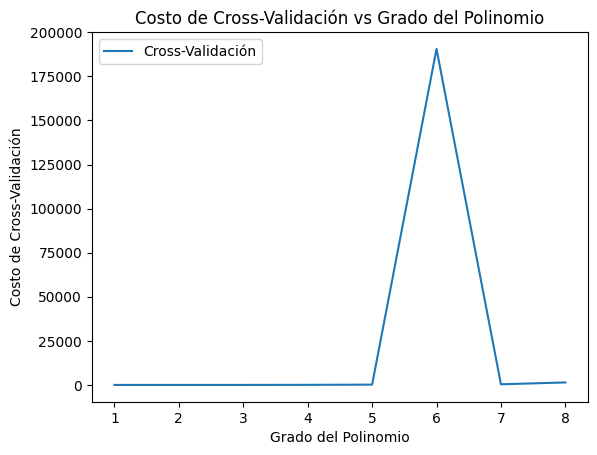

In [5]:
#Parte 4 del ejercicio
def cross_validation_cost(X_train, y_train, X_val, y_val, degree):
    weights = polynomial_regression_fit(X_train, y_train, degree)
    X_val_poly = np.column_stack([np.power(X_val, i) for i in range(0, degree + 1)])
    cost_val = calculate_validation_cost(X_val_poly, y_val, weights, degree)
    return cost_val

cv_costs = []

for degree in range(1, max_degree + 1):
    total_cv_cost = 0
    for fold in range(5):  # 5-fold cross-validation
        fold_start = fold * num_train // 5
        fold_end = (fold + 1) * num_train // 5
        X_train_fold = np.concatenate([X_train[:fold_start], X_train[fold_end:]])
        y_train_fold = np.concatenate([y_train[:fold_start], y_train[fold_end:]])
        X_val_fold = X_train[fold_start:fold_end]
        y_val_fold = y_train[fold_start:fold_end]
        cv_cost = cross_validation_cost(X_train_fold, y_train_fold, X_val_fold, y_val_fold, degree)
        total_cv_cost += cv_cost
    avg_cv_cost = total_cv_cost / 5
    cv_costs.append(avg_cv_cost)

plt.plot(range(1, max_degree + 1), cv_costs, label="Cross-Validación")
plt.xlabel("Grado del Polinomio")
plt.ylabel("Costo de Cross-Validación")
plt.title("Costo de Cross-Validación vs Grado del Polinomio")
plt.legend()
plt.show()